In [1]:
from __future__ import print_function
import pylab as pl
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit, minimize
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
seed(100)
mymean=100
list_hw3={}
print (list_hw3)

{}


# 1.Chi-sq distribution

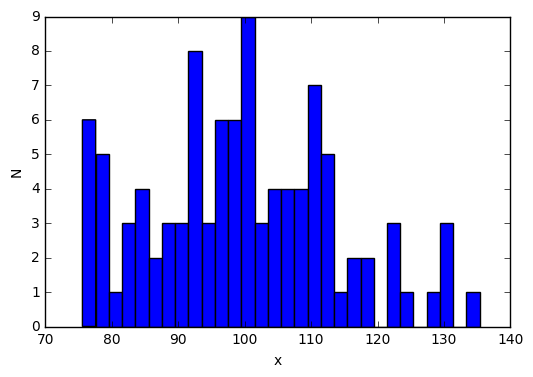

In [3]:
df=mymean
list_hw3['chisq'] = np.random.chisquare(df, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(list_hw3['chisq'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

### Figure 1: Chi sq distribution: df = 100, N=100

In [4]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(list_hw3['chisq'].mean(), list_hw3['chisq'].std()))

Chisq mean: 99.87, standard deviation: 14.07


In [5]:
#mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[211 411 989  28 701  25 320  73  60 111 169 627 438 830 239 190 711 858
 559 704 605 559 860 919 849 254 877 435 729 412 190 706 240 851 824 525
 386 590 137 808 965 779 239 867 808  63 231 589 137 678 992 285 760  46
 332 944 636 601 928 181  17 190 521 495 800 859 212 437 421  54   9 789
 275 717 421 143 192 313 805  12  49 566 686 726 479 367 839 454 321  92
  60  90 682 680 243 640  69 872 109 169] (100,)


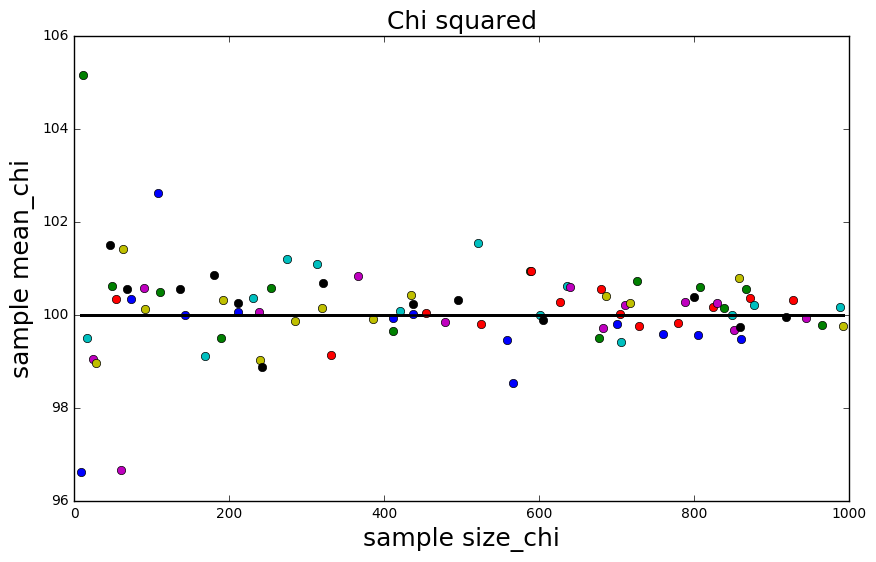

In [6]:
list_hw3['chisq'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    list_hw3['chisq'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

list_hw3['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in list_hw3['chisq']:
    if not type(nn) == str:
        list_hw3['chisq']['means'][nn] = list_hw3['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, list_hw3['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size_chi', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean_chi', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')


### Figure 2: The sample mean is close to 100 (=mymean/the mean of chi-sq)

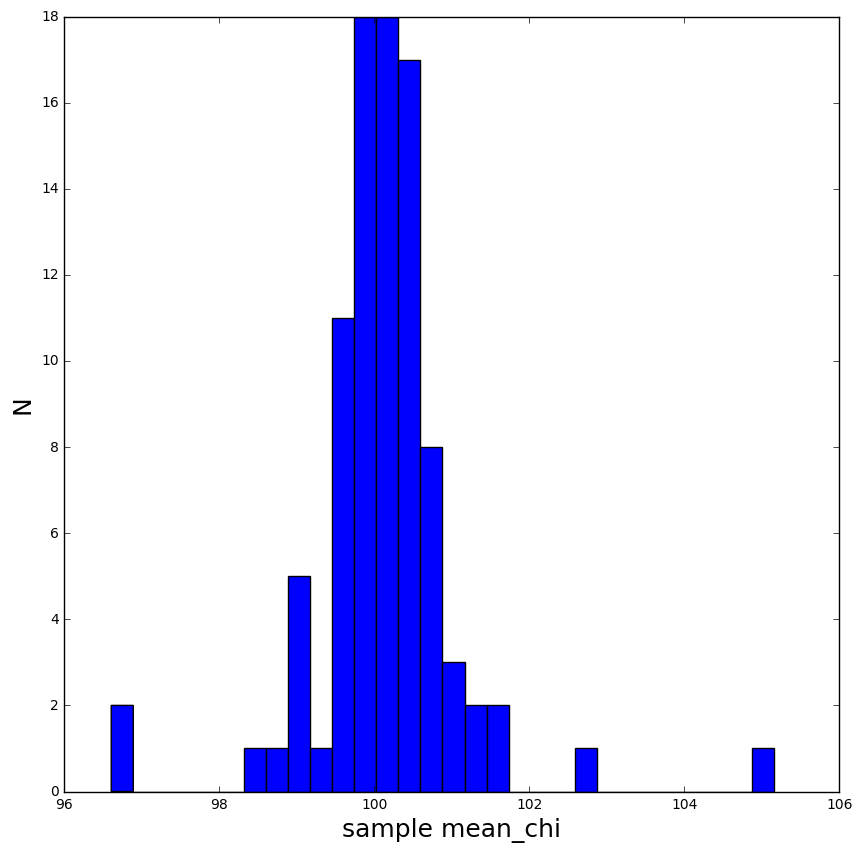

In [7]:
allmeans_chi = list(list_hw3['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans_chi,bins=30)
pl.xlabel('sample mean_chi', fontsize = 18)
pl.ylabel('N', fontsize = 18)

### Figure 3: The distribution figure of sample means is closed to 100(mymean) and also close to a Normal Distribution

# 2.Normal Distribution

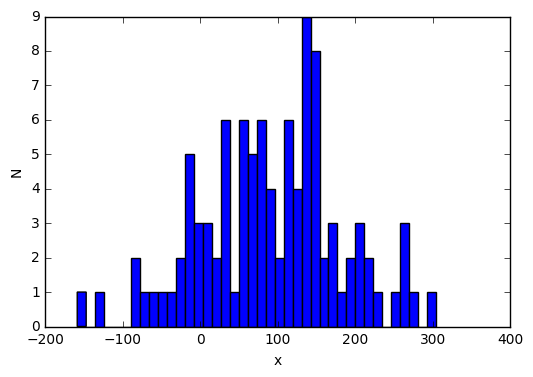

In [8]:
# In normal distribution, the loc equals to the mean
loc = mymean
#print (loc)
list_hw3['normal'] = np.random.normal(loc, scale=100, size=100)
pl.hist(list_hw3['normal'], bins = 40)
pl.ylabel('N')
pl.xlabel('x')

### Figure 1: Normal distribution: loc=100, scale=100, N=100

In [9]:
print ("Normal mean: %.2f, standard deviation: %.2f"%(list_hw3['normal'].mean(), list_hw3['normal'].std()))

Normal mean: 91.16, standard deviation: 91.33


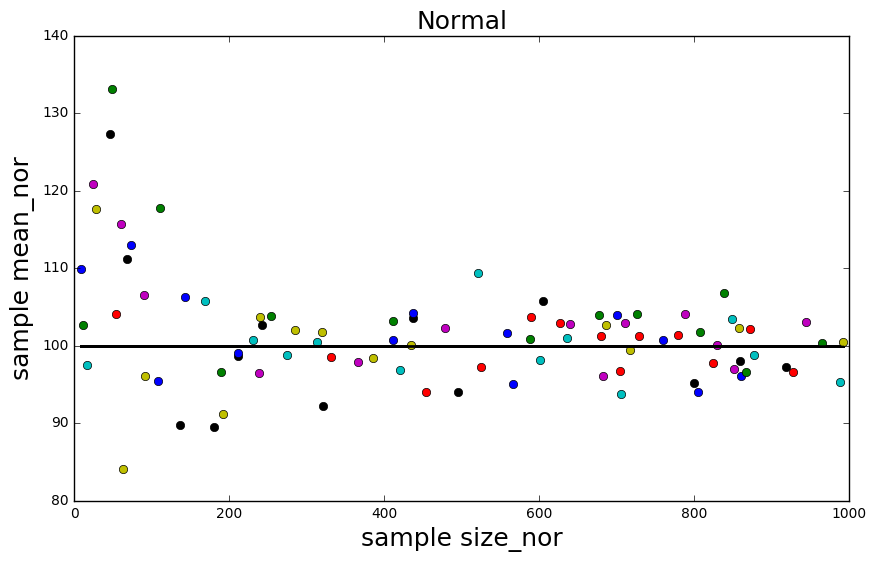

In [10]:
list_hw3['normal'] = {} 

for n in mysize:
    list_hw3['normal'][n] = np.random.normal(loc, scale = 100, size = n)
       

list_hw3['normal']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in list_hw3['normal']:
    if not type(nn) == str:
        list_hw3['normal']['means'][nn] = list_hw3['normal'][nn].mean()
        
        axchisq_mu_n.plot(nn, list_hw3['normal']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size_nor', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean_nor', fontsize=18)
        axchisq_mu_n.set_title('Normal', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [loc,loc], 'k')

### Figure 2: The sample mean is close to 100 (=mymean/the mean of the normal distribution)

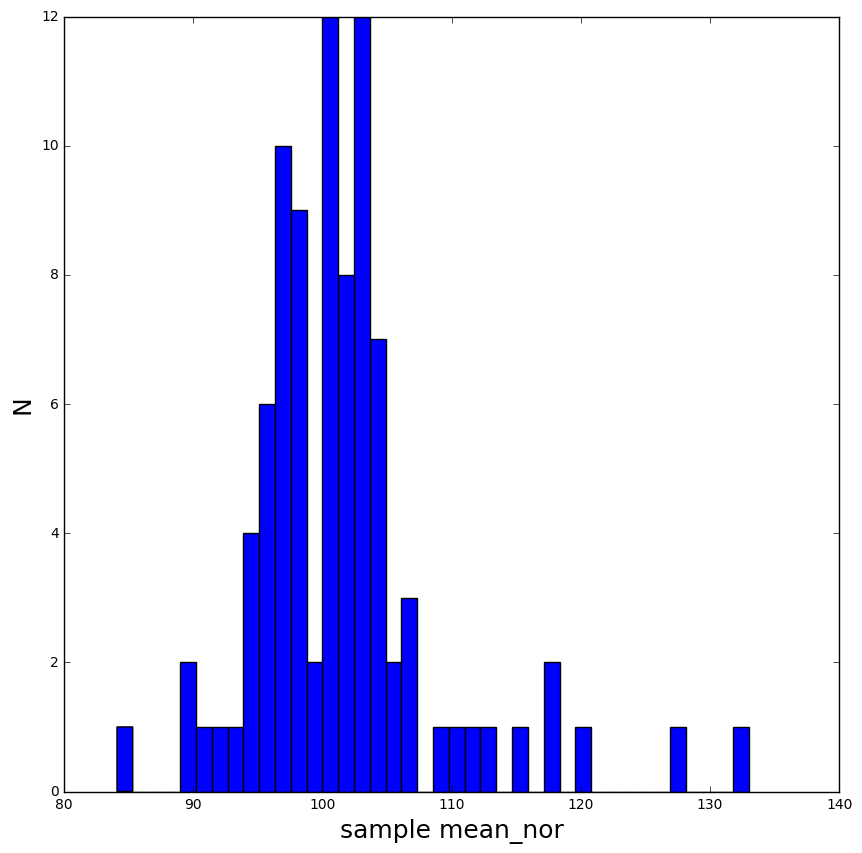

In [11]:
allmeans_nor = list(list_hw3['normal']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans_nor,bins=40)
pl.xlabel('sample mean_nor', fontsize = 18)
pl.ylabel('N', fontsize = 18)

### Figure 3: The distribution figure of sample means is closed to 100(mymean) and also close to a Normal Distribution

# 3. Poisson Distribution

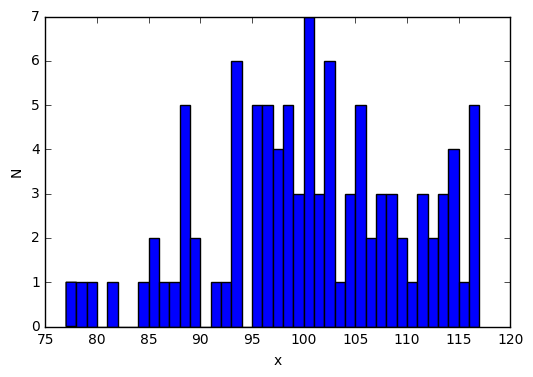

In [12]:
# In poisson distribution, the lam equals to the mean
lam = mymean
list_hw3['poisson'] = np.random.poisson(lam, size=100)
pl.hist(list_hw3['poisson'], bins = 40)
pl.ylabel('N')
pl.xlabel('x')

### Figure 1: Poisson distribution: lam=100, N=100

In [13]:
print ("Poisson mean: %.2f, standard deviation: %.2f"%(list_hw3['poisson'].mean(), list_hw3['poisson'].std()))

Poisson mean: 100.20, standard deviation: 9.46


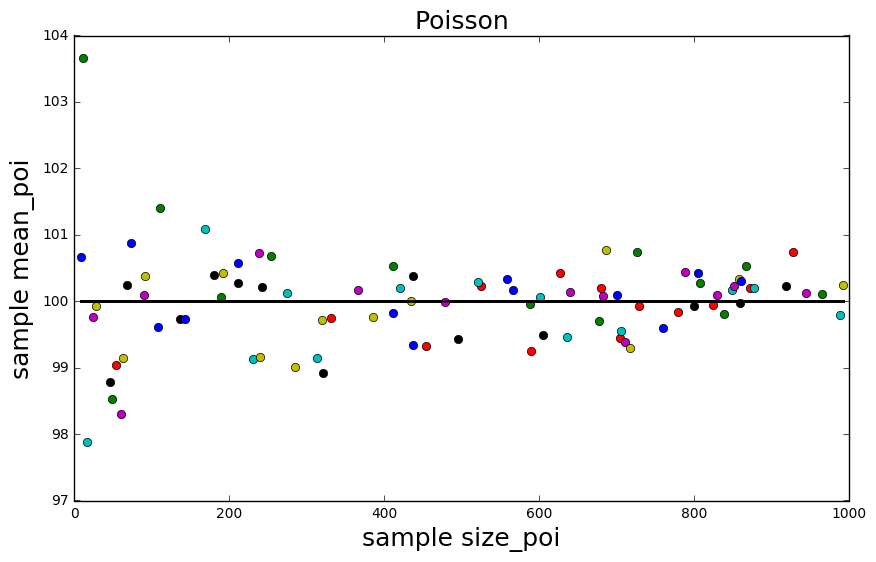

In [14]:
list_hw3['poisson'] = {} 

for n in mysize:
    list_hw3['poisson'][n] = np.random.poisson(lam, size = n)
       

list_hw3['poisson']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in list_hw3['poisson']:
    if not type(nn) == str:
        list_hw3['poisson']['means'][nn] = list_hw3['poisson'][nn].mean()
        
        axchisq_mu_n.plot(nn, list_hw3['poisson']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size_poi', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean_poi', fontsize=18)
        axchisq_mu_n.set_title('Poisson', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [lam,lam], 'k')

### Figure 2: The sample mean is close to 100 (=mymean/the mean of the poission distribution)

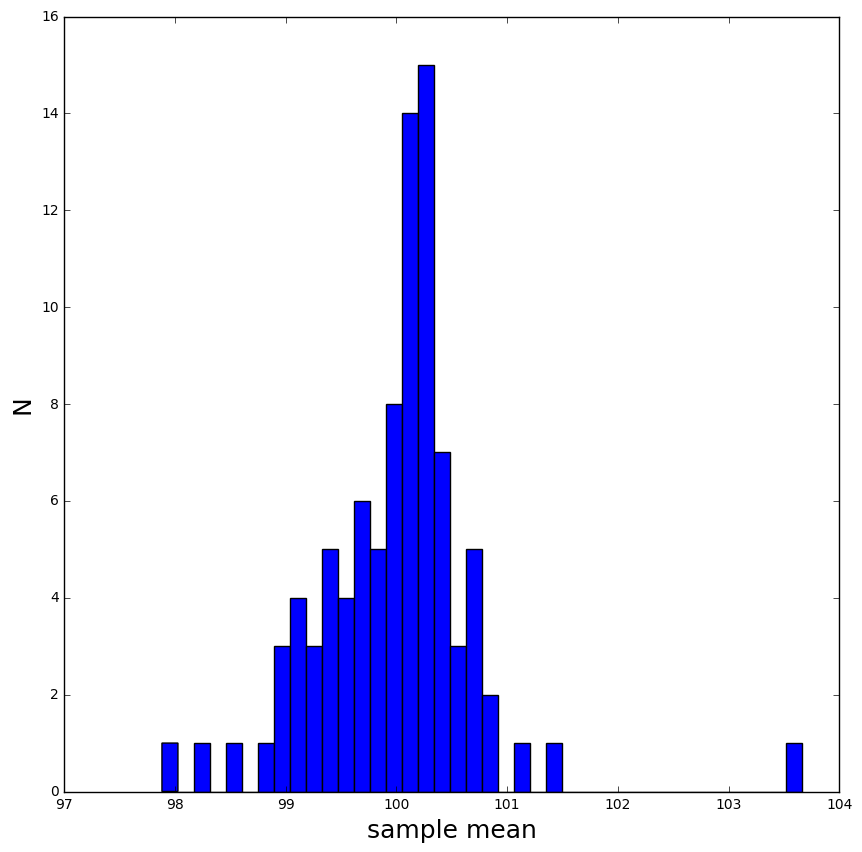

In [15]:
allmeans_poi = list(list_hw3['poisson']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans_poi,bins=40)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

### Figure 3: The distribution figure of sample means is closed to 100(mymean) and also close to a Normal Distribution

# 4. Binomial Distribution

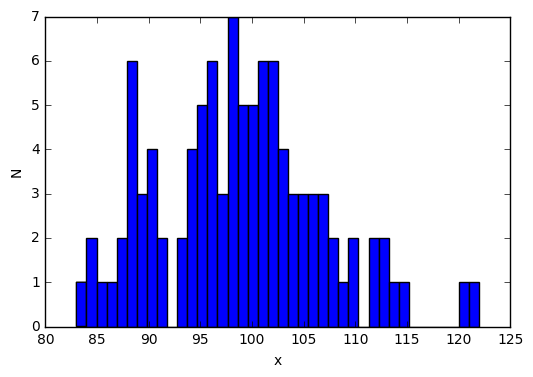

In [16]:
# In binomial distribution, the result of n*p equals to the mean
n = 1000
p = 0.1
list_hw3['binomial'] = np.random.binomial(n, p, size=100)
pl.hist(list_hw3['binomial'], bins = 40)
pl.ylabel('N')
pl.xlabel('x')

### Fig1 Binomial Distribution,n=1000,p=0.1

In [17]:
print ("Binomial mean: %.2f, standard deviation: %.2f"%(list_hw3['binomial'].mean(), list_hw3['binomial'].std()))

Binomial mean: 98.81, standard deviation: 8.10


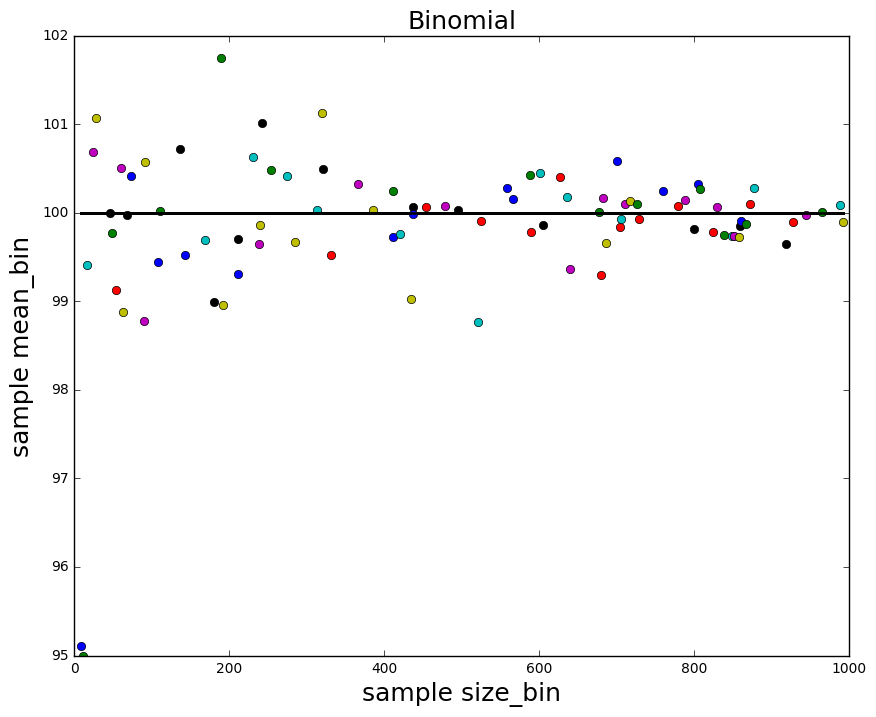

In [18]:

list_hw3['binomial'] = {}
for x in mysize:
    list_hw3['binomial'][x] = np.random.binomial(n, p, size = x)
       

list_hw3['binomial']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,8)).add_subplot(111)

for ii in list_hw3['binomial']:
    if not type(ii) == str:
        list_hw3['binomial']['means'][ii] = list_hw3['binomial'][ii].mean()
        
        axchisq_mu_n.plot(ii, list_hw3['binomial']['means'][ii], 'o')
        axchisq_mu_n.set_xlabel('sample size_bin', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean_bin', fontsize=18)
        axchisq_mu_n.set_title('Binomial', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [n*p,n*p], 'k')

### Figure 2: The sample mean is close to 100 (=mymean/the mean of binomial distribution)

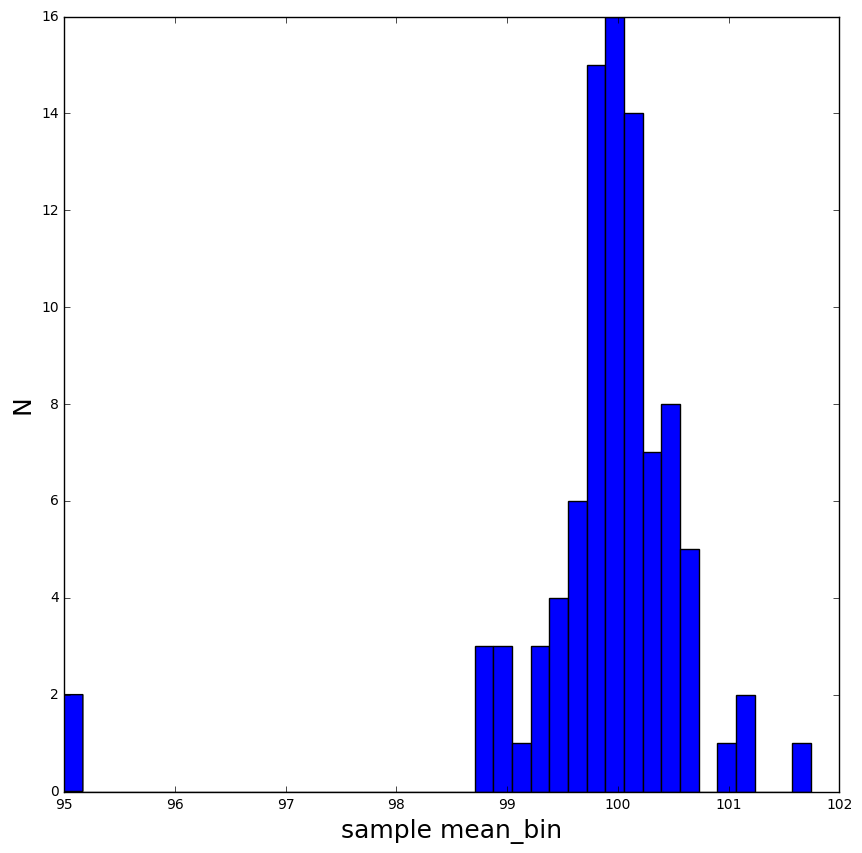

In [19]:
allmeans_bin = list(list_hw3['binomial']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans_bin,bins=40)
pl.xlabel('sample mean_bin', fontsize = 18)
pl.ylabel('N', fontsize = 18)

### Figure 3: The distribution figure of sample means is closed to 100(mymean)and also close to a Normal Distribution

# 5. Exponential Distribution

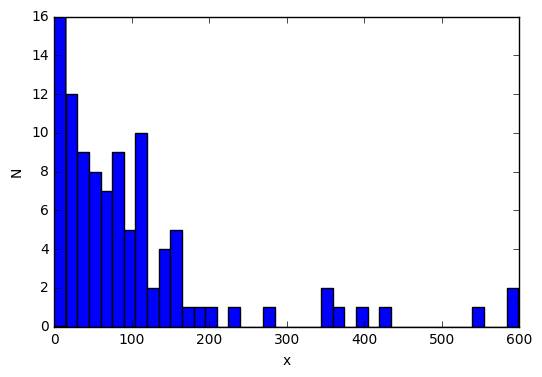

In [20]:
scale=mymean
list_hw3['exponential'] = np.random.exponential(scale, size=100)
pl.hist(list_hw3['exponential'], bins = 40)
pl.ylabel('N')
pl.xlabel('x')

### Fig1.Exponential Distribution, scale=100, size=100

In [21]:
print ("Exponential mean: %.2f, standard deviation: %.2f"%(list_hw3['exponential'].mean(), list_hw3['exponential'].std()))

Exponential mean: 103.12, standard deviation: 120.78


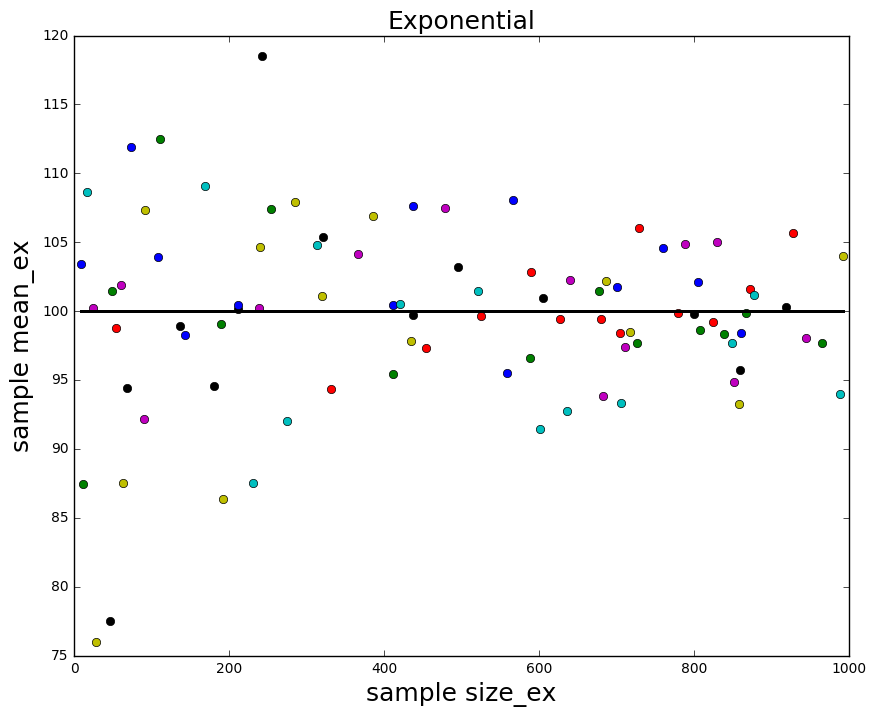

In [22]:
list_hw3['exponential'] = {} 

for i in mysize:
    list_hw3['exponential'][i] = np.random.exponential(scale, size = i)
       

list_hw3['exponential']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,8)).add_subplot(111)

for ii in list_hw3['exponential']:
    if not type(ii) == str:
        list_hw3['exponential']['means'][ii] = list_hw3['exponential'][ii].mean()
        axchisq_mu_n.plot(ii,list_hw3['exponential']['means'][ii], 'o')
        axchisq_mu_n.set_xlabel('sample size_ex', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean_ex', fontsize=18)
        axchisq_mu_n.set_title('Exponential', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [scale,scale], 'k')

### Figure 2: The sample mean is close to 100 (=mymean/the mean of Exponential Distribution)

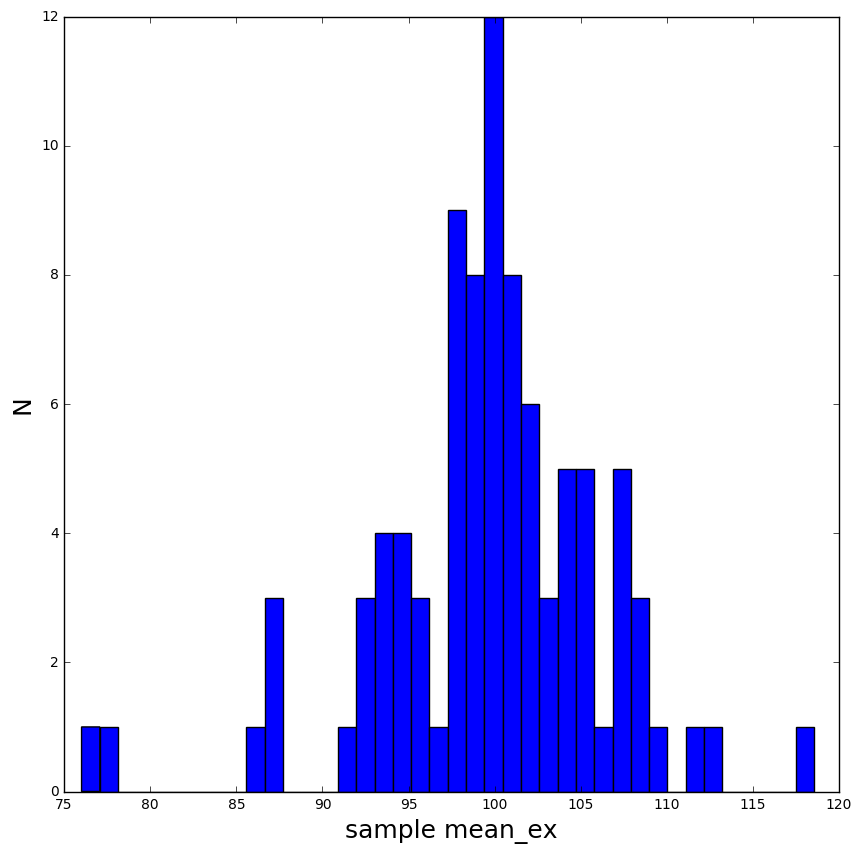

In [23]:
allmeans_ex = list(list_hw3['exponential']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans_ex,bins=40)
pl.xlabel('sample mean_ex', fontsize = 18)
pl.ylabel('N', fontsize = 18)

### Figure 3: The distribution figure of sample means is closed to 100(mymean)and also close to a Normal Distribution